In [1]:
import pandas as pd

In [2]:
file_path = '/Users/lenaivian/Downloads/amz_uk_processed_data.csv'

In [3]:
# Load the dataset
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
# Check column info and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222742 entries, 0 to 2222741
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   isBestSeller       bool   
 8   boughtInLastMonth  int64  
 9   categoryName       object 
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 154.7+ MB


asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

Sampling the data

In [5]:
# Summary statistics for numerical columns
df.describe()

,stars,reviews,price,boughtInLastMonth
count,2.222742e+06,2.222742e+06,2.222742e+06,2.222742e+06
mean,2.031870e+00,3.821617e+02,9.425737e+01,1.856902e+01
std,2.185497e+00,5.020752e+03,3.606225e+02,1.919030e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.990000e+01,0.000000e+00
75%,4.400000e+00,4.400000e+01,4.771000e+01,0.000000e+00
max,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [6]:
## Removing unecessary columns
df = df.drop(columns=['imgUrl', 'productURL'])

In [7]:
## Checking dataset

# Verify the remaining columns
print(df.columns)

# Check basic statistics for the updated dataset
df.describe()

# Check for missing values again
df.isnull().sum()

Index(['asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'categoryName'],
      dtype='object')


asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64

## EDA: Exploratory Data Analysis

In [8]:
# Find the minimum and maximum prices
min_price = df['price'].min()
max_price = df['price'].max()

print(f"Minimum Price: £{min_price}")
print(f"Maximum Price: £{max_price}")

Minimum Price: £0.0
Maximum Price: £100000.0


# Prices range from £ 0-100,000

In [9]:
# Quantiles of price
print(df['price'].quantile([0.25, 0.5, 0.75, 0.95, 0.99]))

0.25      10.0000
0.50      19.9000
0.75      47.7100
0.95     379.0895
0.99    1492.0472
Name: price, dtype: float64


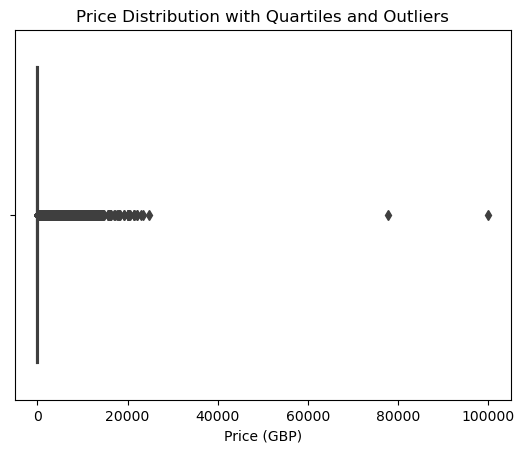

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for price
sns.boxplot(x=df['price'])

# Add title and labels
plt.title('Price Distribution with Quartiles and Outliers')
plt.xlabel('Price (GBP)')
plt.show()

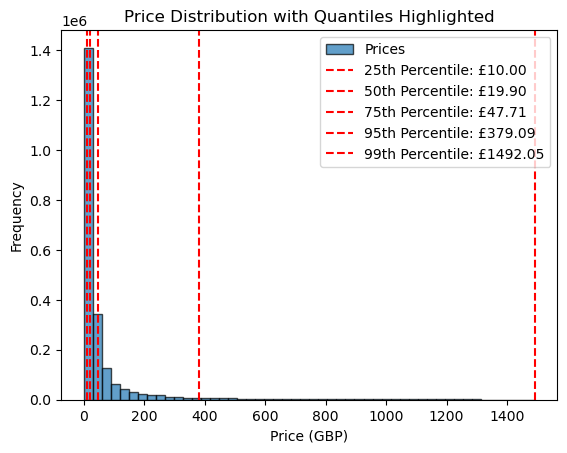

In [11]:
# Quantile values
quantiles = df['price'].quantile([0.25, 0.50, 0.75, 0.95, 0.99])

# Plot histogram
plt.hist(df[df['price'] <= 1492.05]['price'], bins=50, edgecolor='black', alpha=0.7, label='Prices')

# Add vertical lines for quantiles
for q, value in quantiles.items():
    plt.axvline(value, color='red', linestyle='--', label=f'{int(q * 100)}th Percentile: £{value:.2f}')

# Add title and labels
plt.title('Price Distribution with Quantiles Highlighted')
plt.xlabel('Price (GBP)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

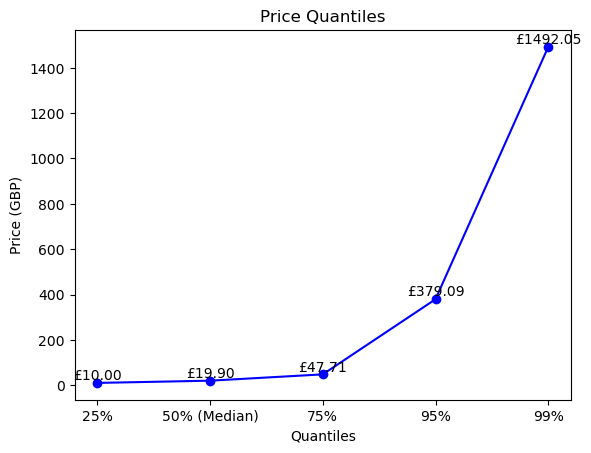

In [12]:
# Quantile values for plotting
quantile_values = [10.00, 19.90, 47.71, 379.09, 1492.05]
quantile_labels = ['25%', '50% (Median)', '75%', '95%', '99%']

# Plot the quantiles
plt.plot(quantile_labels, quantile_values, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Price Quantiles')
plt.xlabel('Quantiles')
plt.ylabel('Price (GBP)')

# Annotate each point
for i, value in enumerate(quantile_values):
    plt.text(quantile_labels[i], value, f'£{value:.2f}', ha='center', va='bottom')

plt.show()

## Rating Distribution 

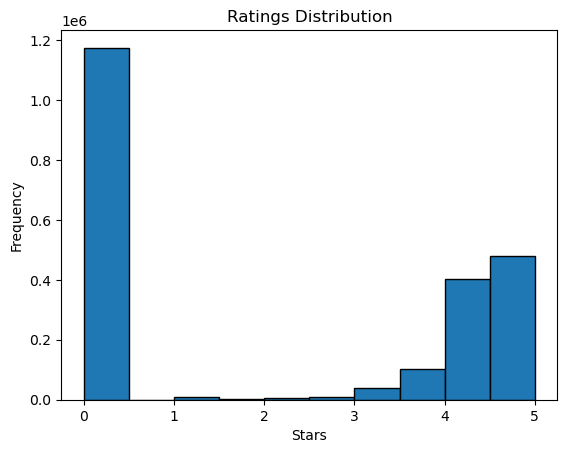

In [13]:
import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.hist(df['stars'], bins=10, edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

## Best Seller Analysis

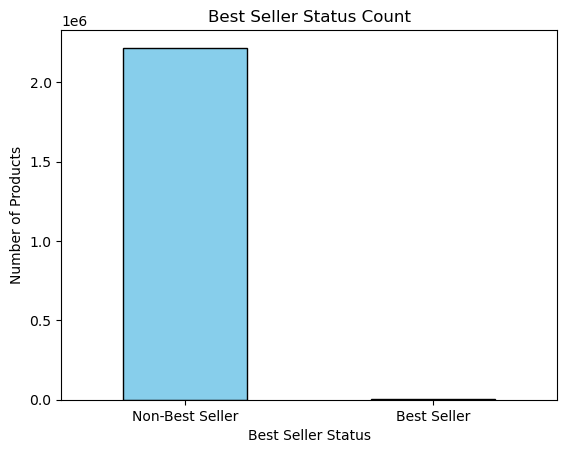

In [14]:
# Count of best sellers vs. non-best sellers
best_seller_counts = df['isBestSeller'].value_counts()

# Bar chart
best_seller_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Best Seller Status Count')
plt.xticks([0, 1], ['Non-Best Seller', 'Best Seller'], rotation=0)
plt.xlabel('Best Seller Status')
plt.ylabel('Number of Products')
plt.show()

In [15]:
# Average metrics for best sellers and non-best sellers
comparison = df.groupby('isBestSeller')[['price', 'stars', 'reviews']].mean()
print(comparison)

                  price     stars      reviews
isBestSeller                                  
False         94.449806  2.025399   365.985580
True          23.375374  4.415420  6340.619143


In [16]:
# Example: Filtering products bought last month with a minimum threshold
df_filtered = df[df['boughtInLastMonth'] > 0] 

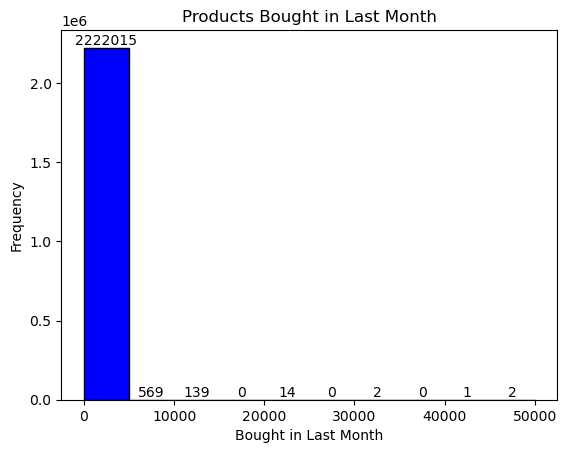

In [17]:
# Plot histogram directly from df
counts, bins, bars = plt.hist(df['boughtInLastMonth'], bins=10, edgecolor='black', color='blue')

# Annotate each bar with frequency
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.title('Products Bought in Last Month')
plt.xlabel('Bought in Last Month')
plt.ylabel('Frequency')
plt.show()

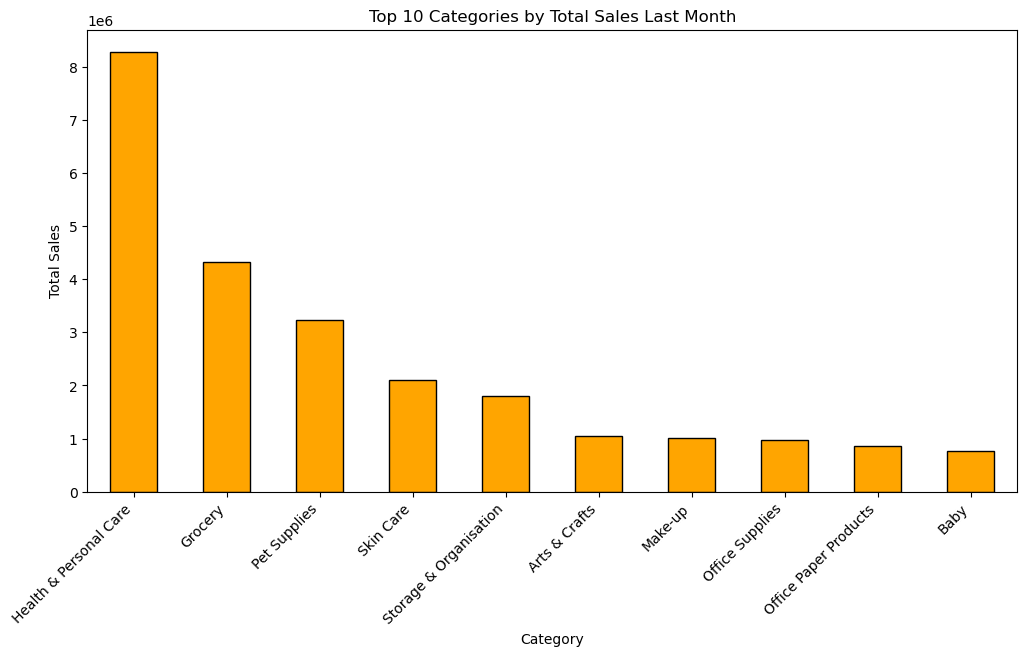

In [18]:
# Aggregate total sales by category
sales_by_category = df.groupby('categoryName')['boughtInLastMonth'].sum().sort_values(ascending=False).head(10)

# Bar plot for top 10 categories
plt.figure(figsize=(12, 6))
sales_by_category.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Categories by Total Sales Last Month')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
top_categories = df['categoryName'].value_counts().head(10)

In [20]:
print(df.columns)

Index(['asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'categoryName'],
      dtype='object')


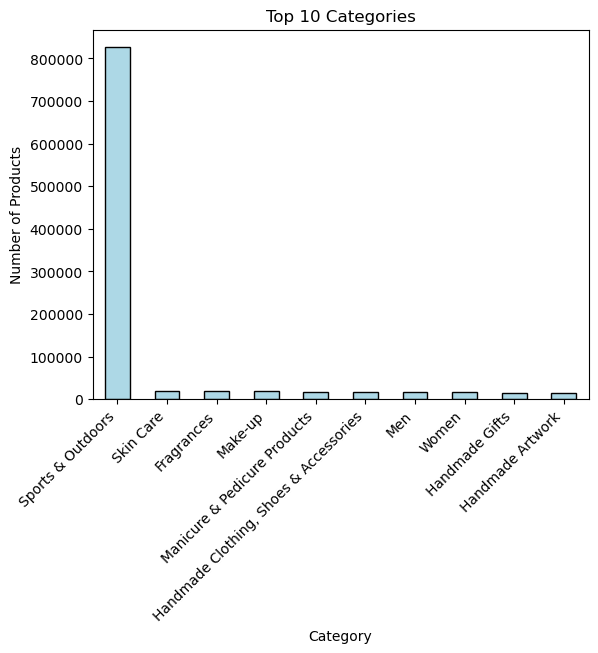

In [21]:
import matplotlib.pyplot as plt

# Bar chart with rotated x-axis labels
top_categories.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
plt.show()

## Star Ratings Distribution

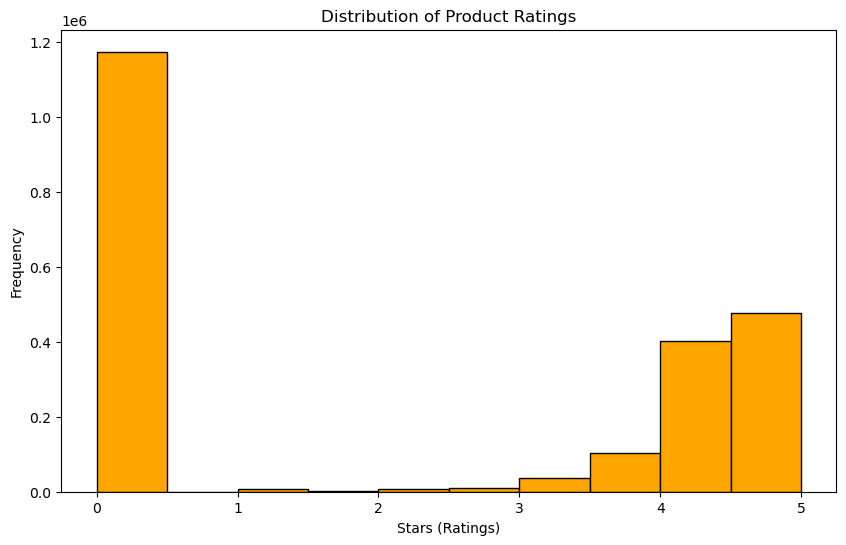

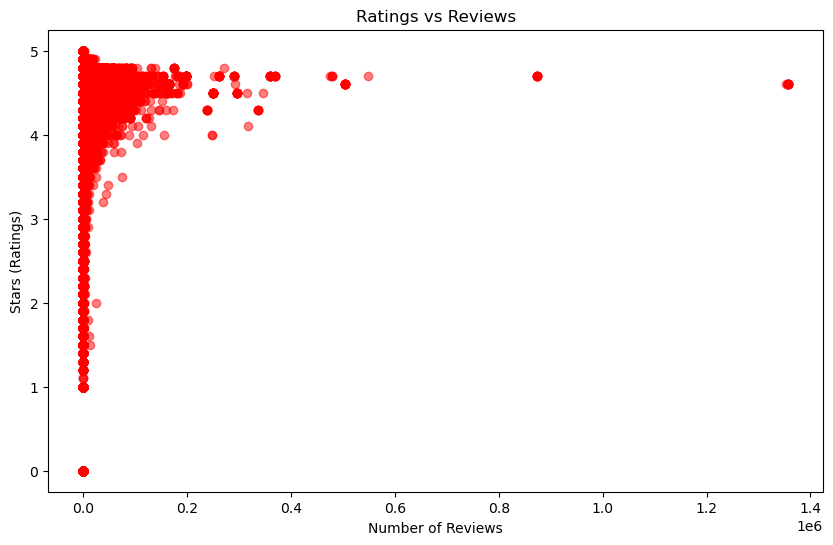

In [22]:
# Plot distribution of stars
plt.figure(figsize=(10, 6))
plt.hist(df['stars'], bins=10, edgecolor='black', color='orange')
plt.title('Distribution of Product Ratings')
plt.xlabel('Stars (Ratings)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Stars vs Reviews
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews'], df['stars'], alpha=0.5, color='red')
plt.title('Ratings vs Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Stars (Ratings)')
plt.show()

## CLUSTERING

In [23]:
print(df.isnull().sum())

asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
dtype: int64


In [24]:
print(df.columns)

Index(['asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'categoryName'],
      dtype='object')


## Normalizing features

In [25]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['price', 'stars', 'reviews', 'boughtInLastMonth']
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means Clustering

In [26]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  
df['cluster'] = kmeans.fit_predict(X_scaled)

/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Check Cluster Size

0    1161749
2    1031209
1      27881
3       1903
Name: cluster, dtype: int64


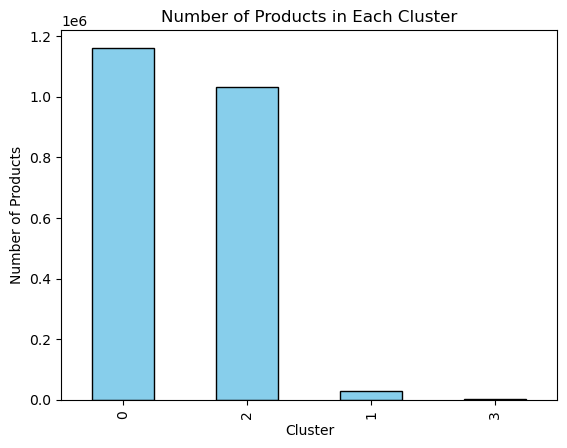

In [27]:
# Count the number of products in each cluster
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)

# Optional: Visualize cluster sizes
import matplotlib.pyplot as plt
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Products in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Products')
plt.show()

## Adding Revenue Column

In [28]:
print(df['boughtInLastMonth'].describe())

count    2.222742e+06
mean     1.856902e+01
std      1.919030e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+04
Name: boughtInLastMonth, dtype: float64


In [29]:
# Reapply filtering for products with purchases in the last month
df = df[df['boughtInLastMonth'] > 0]

# Check the number of remaining rows
print(f"Number of products bought last month: {len(df)}")

# Inspect the dataset
print(df.head())

Number of products bought last month: 161315
           asin                                              title  stars  \
29   B01N4V4X5M  Upgraded, Anker Soundcore Boost Bluetooth Spea...    4.7   
32   B07WVP26FR  Kolaura Portable Wireless Speaker, Bluetooth 5...    4.4   
92   B083K77PZL  W-KING Bluetooth Speaker, 50W Speakers Wireles...    4.6   
143  B09J47Y789  XSOUND Portable Bluetooth Speaker Wireless 24W...    4.4   
160  B08FCDFHLB  soundcore Anker Mini 3 Bluetooth Speaker, Bass...    4.7   

     reviews  price  isBestSeller  boughtInLastMonth    categoryName  cluster  
29     29387  39.98         False                600  Hi-Fi Speakers        2  
32      2493  15.99         False               1000  Hi-Fi Speakers        2  
92      2979  65.59         False                200  Hi-Fi Speakers        2  
143      804  22.99         False                200  Hi-Fi Speakers        2  
160     3208  34.99         False                200  Hi-Fi Speakers        2  


In [30]:
# Add revenue column
df['revenue'] = df['price'] * df['boughtInLastMonth']

# Verify the calculation
print(df[['price', 'boughtInLastMonth', 'revenue']].head())

     price  boughtInLastMonth  revenue
29   39.98                600  23988.0
32   15.99               1000  15990.0
92   65.59                200  13118.0
143  22.99                200   4598.0
160  34.99                200   6998.0


In [31]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical columns
print(df.describe())

asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
categoryName         0
cluster              0
revenue              0
dtype: int64
               stars        reviews          price  boughtInLastMonth  \
count  161315.000000  161315.000000  161315.000000      161315.000000   
mean        4.352075    1619.443555      16.937491         255.860583   
std         0.531658    5398.374956      25.617531         668.371685   
min         0.000000       0.000000       0.220000          50.000000   
25%         4.300000      84.000000       6.900000          50.000000   
50%         4.400000     340.000000      10.990000         100.000000   
75%         4.600000    1218.500000      18.910000         200.000000   
max         5.000000  479337.000000     990.000000       50000.000000   

             cluster       revenue  
count  161315.000000  1.613150e+05  
mean        1.990224  3.7

## Analyze Clusters

In [32]:
cluster_sizes = df['cluster'].value_counts()
print(cluster_sizes)

2    157849
3      1785
0      1681
Name: cluster, dtype: int64


In [33]:
cluster_summary = df.groupby('cluster')[['price', 'stars', 'reviews', 'boughtInLastMonth', 'revenue']].mean()
print(cluster_summary)

             price     stars       reviews  boughtInLastMonth       revenue
cluster                                                                    
0        15.381190  0.199524      1.218322          82.510410   1863.549078
2        17.009136  4.394649   1504.159748         204.159355   3110.350462
3        12.067507  4.497815  13338.026331        4991.092437  59378.919328


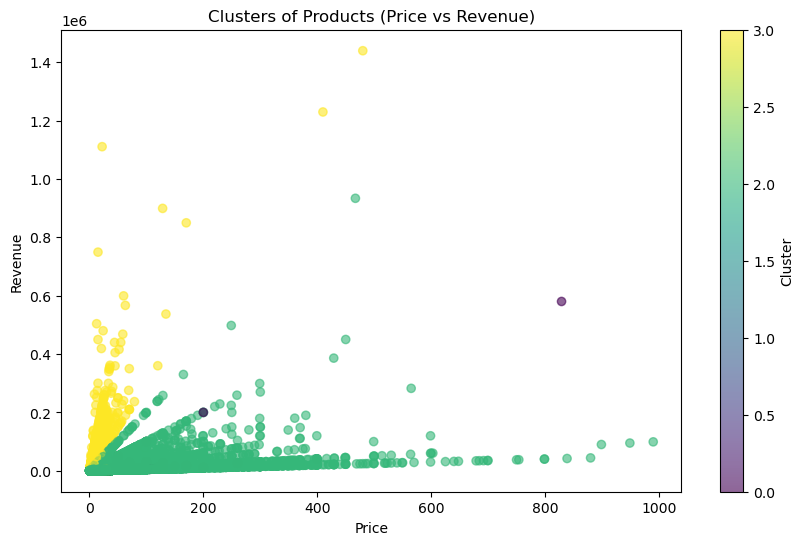

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['revenue'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Products (Price vs Revenue)')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.colorbar(label='Cluster')
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['price', 'stars', 'reviews', 'boughtInLastMonth', 'revenue']
X = df[features]

# Rescale the filtered dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
from sklearn.cluster import KMeans

# Re-run K-Means for the filtered dataset
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.79


## Clustering

In [38]:
features = ['stars', 'reviews', 'boughtInLastMonth', 'revenue']

In [39]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.cluster import KMeans

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters if needed
df['cluster'] = kmeans.fit_predict(X_scaled)

# View cluster sizes
print(df['cluster'].value_counts())

/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    156901
2      1751
1      1360
3      1303
Name: cluster, dtype: int64


In [41]:
# Calculate cluster averages for key features
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

            stars       reviews  boughtInLastMonth       revenue
cluster                                                         
0        4.395174   1210.340928         210.360355   2979.566580
1        4.486176  42138.181618         729.080882  11842.335662
2        0.281325     25.109652          87.635637   1494.631354
3        4.492709  10732.878741        5466.922487  87390.679202


In [42]:
# Count product categories per cluster
category_counts = df.groupby('cluster')['categoryName'].value_counts()
print(category_counts)

cluster  categoryName              
0        Pet Supplies                  8847
         Storage & Organisation        8025
         Health & Personal Care        7550
         Skin Care                     6557
         Grocery                       5859
                                       ... 
3        Pools, Hot Tubs & Supplies       1
         Power & Hand Tools               1
         Rough Plumbing                   1
         Sports Supplements               1
         Women                            1
Name: categoryName, Length: 522, dtype: int64


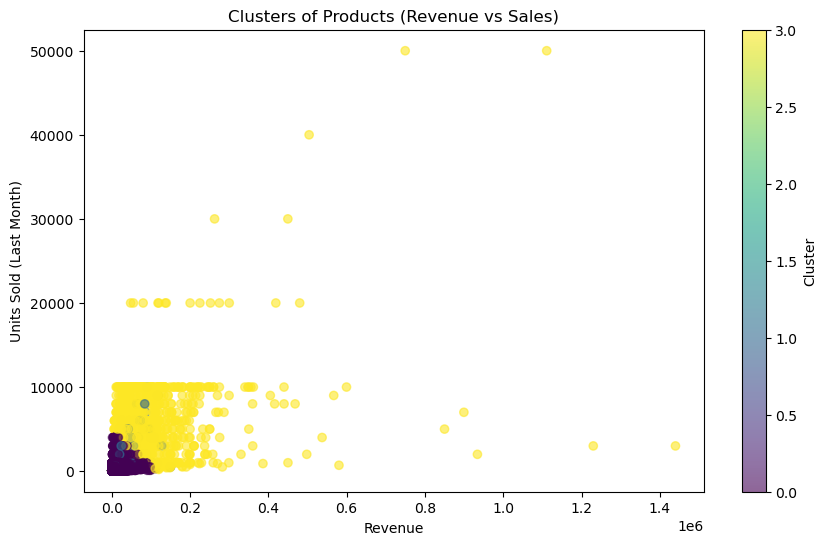

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['revenue'], df['boughtInLastMonth'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Products (Revenue vs Sales)')
plt.xlabel('Revenue')
plt.ylabel('Units Sold (Last Month)')
plt.colorbar(label='Cluster')
plt.show()

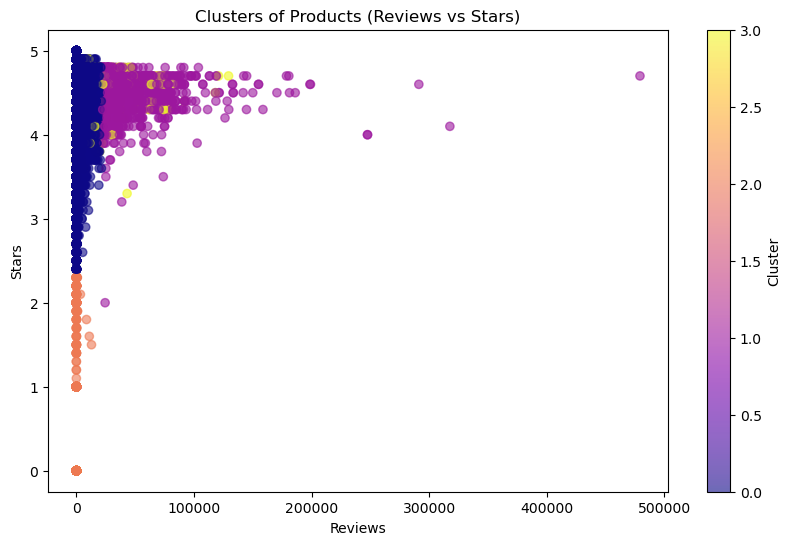

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews'], df['stars'], c=df['cluster'], cmap='plasma', alpha=0.6)
plt.title('Clusters of Products (Reviews vs Stars)')
plt.xlabel('Reviews')
plt.ylabel('Stars')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
# Calculate cluster averages for key metrics
cluster_summary = df.groupby('cluster')[['stars', 'reviews', 'boughtInLastMonth', 'revenue']].mean()
print(cluster_summary)

            stars       reviews  boughtInLastMonth       revenue
cluster                                                         
0        4.395174   1210.340928         210.360355   2979.566580
1        4.486176  42138.181618         729.080882  11842.335662
2        0.281325     25.109652          87.635637   1494.631354
3        4.492709  10732.878741        5466.922487  87390.679202


In [46]:
# Count categories per cluster
category_counts = df.groupby('cluster')['categoryName'].value_counts()
print(category_counts)

cluster  categoryName              
0        Pet Supplies                  8847
         Storage & Organisation        8025
         Health & Personal Care        7550
         Skin Care                     6557
         Grocery                       5859
                                       ... 
3        Pools, Hot Tubs & Supplies       1
         Power & Hand Tools               1
         Rough Plumbing                   1
         Sports Supplements               1
         Women                            1
Name: categoryName, Length: 522, dtype: int64


In [47]:
features = ['price']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_price'] = kmeans.fit_predict(X_scaled)

/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


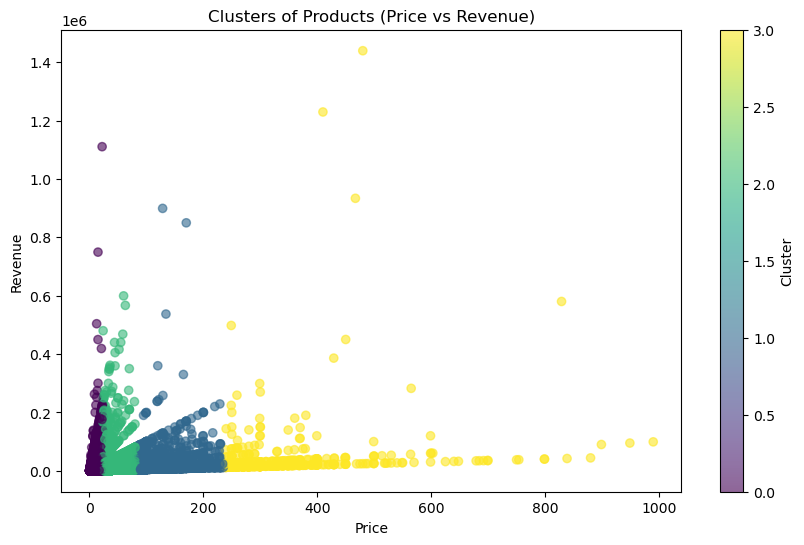

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['revenue'], c=df['cluster_price'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Products (Price vs Revenue)')
plt.xlabel('Price')
plt.ylabel('Revenue')
plt.colorbar(label='Cluster')
plt.show()

In [49]:
features = ['stars', 'boughtInLastMonth']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_sentiment_sales'] = kmeans.fit_predict(X_scaled)

/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


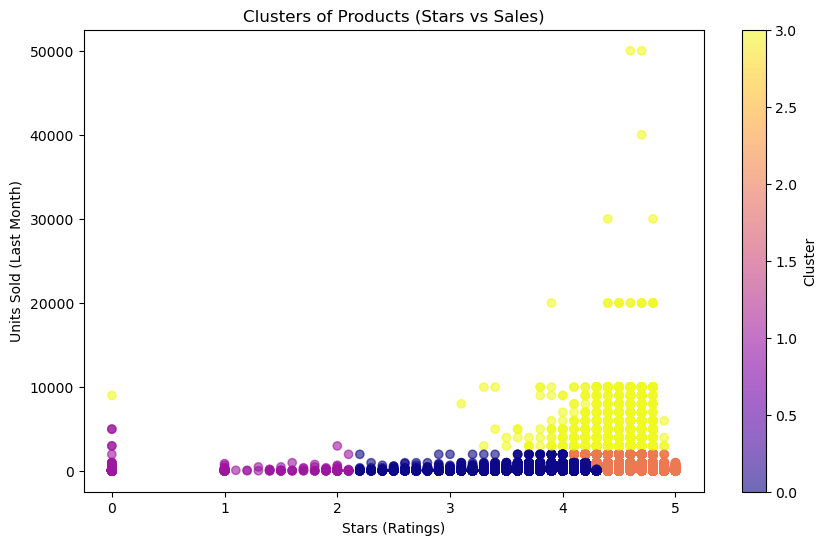

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df['stars'], df['boughtInLastMonth'], c=df['cluster_sentiment_sales'], cmap='plasma', alpha=0.6)
plt.title('Clusters of Products (Stars vs Sales)')
plt.xlabel('Stars (Ratings)')
plt.ylabel('Units Sold (Last Month)')
plt.colorbar(label='Cluster')
plt.show()

In [51]:
features = ['reviews', 'boughtInLastMonth']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster_popularity'] = kmeans.fit_predict(X_scaled)

/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


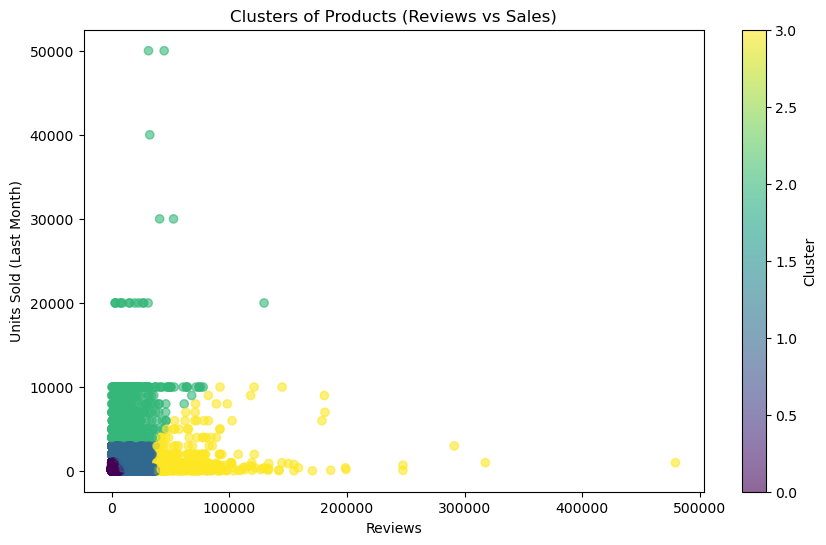

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews'], df['boughtInLastMonth'], c=df['cluster_popularity'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Products (Reviews vs Sales)')
plt.xlabel('Reviews')
plt.ylabel('Units Sold (Last Month)')
plt.colorbar(label='Cluster')
plt.show()

In [53]:
# Group by categoryName and calculate averages
category_summary = df.groupby('categoryName')[['revenue', 'stars', 'reviews', 'boughtInLastMonth']].mean()
category_summary = category_summary.sort_values('revenue', ascending=False)
print(category_summary)

                                          revenue     stars      reviews  \
categoryName                                                               
Water Coolers, Filters & Cartridges  22026.728723  4.501064  7054.606383   
Coffee & Espresso Machines           20432.074074  4.357407  3073.953704   
Mowers & Outdoor Power Tools         15220.781250  4.156250   705.687500   
Professional Medical Supplies        15065.879310  4.448276  3599.724138   
PC & Video Games                     13377.435850  4.155059  2812.865103   
...                                           ...       ...          ...   
Handmade Jewellery                     547.633929  4.362500   251.946429   
Computer Screws                        511.500000  4.521053   498.421053   
Handmade Baby Products                 432.166667  4.766667    22.000000   
Ski Goggles                            414.250000  4.200000  1198.000000   
Barebone PCs                           399.500000  4.300000  1071.000000   

           

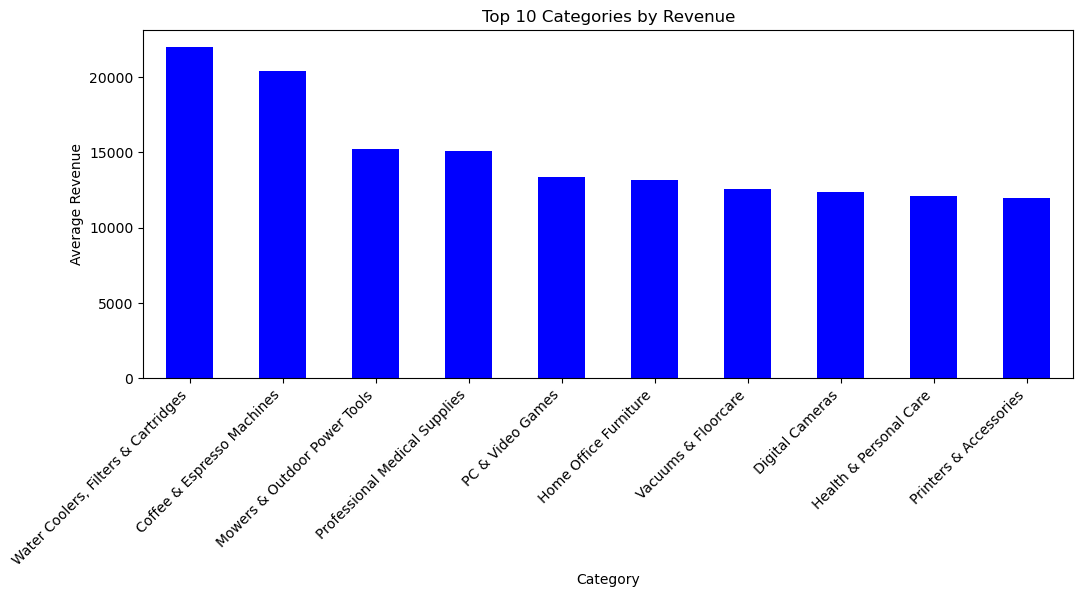

In [54]:
category_revenue = category_summary['revenue'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_revenue.head(10).plot(kind='bar', color='blue')  # Top 10 categories
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate and align text to avoid overlap
plt.subplots_adjust(bottom=0.3)  # Add space for the x-axis labels
plt.show()

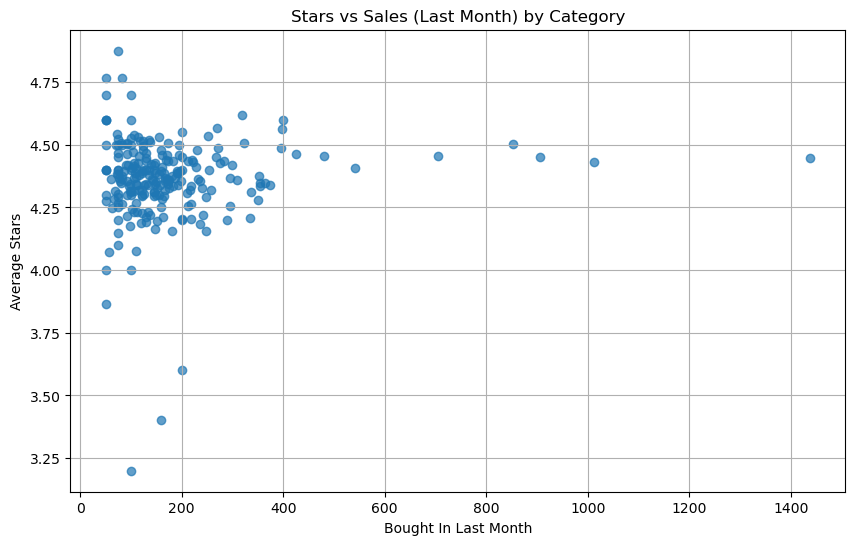

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(category_summary['boughtInLastMonth'], category_summary['stars'], alpha=0.7)
plt.title('Stars vs Sales (Last Month) by Category')
plt.xlabel('Bought In Last Month')
plt.ylabel('Average Stars')
plt.grid()
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['stars', 'reviews', 'boughtInLastMonth', 'revenue']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
df['product_cluster'] = kmeans.fit_predict(X_scaled)

# View cluster sizes
print(df['product_cluster'].value_counts())

/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    156901
2      1751
1      1360
3      1303
Name: product_cluster, dtype: int64


In [58]:
cluster_summary = df.groupby('product_cluster')[features].mean()
print(cluster_summary)

                    stars       reviews  boughtInLastMonth       revenue
product_cluster                                                         
0                4.395174   1210.340928         210.360355   2979.566580
1                4.486176  42138.181618         729.080882  11842.335662
2                0.281325     25.109652          87.635637   1494.631354
3                4.492709  10732.878741        5466.922487  87390.679202


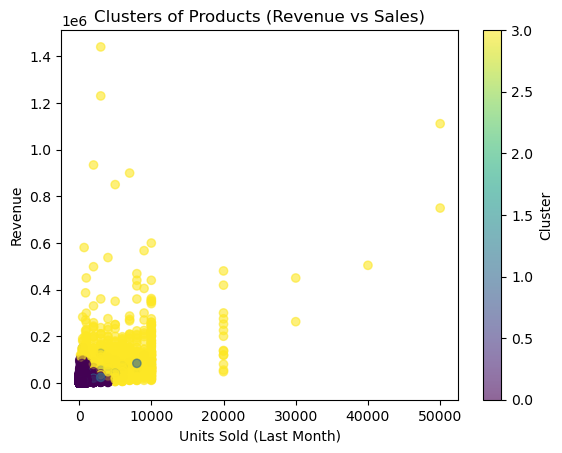

In [59]:
import matplotlib.pyplot as plt

plt.scatter(df['boughtInLastMonth'], df['revenue'], c=df['product_cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Products (Revenue vs Sales)')
plt.xlabel('Units Sold (Last Month)')
plt.ylabel('Revenue')
plt.colorbar(label='Cluster')
plt.show()

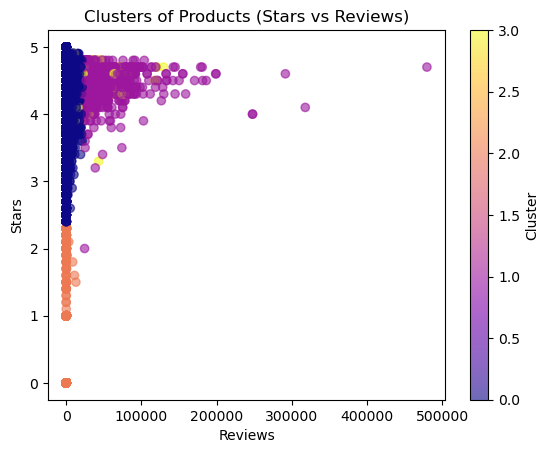

In [60]:
plt.scatter(df['reviews'], df['stars'], c=df['product_cluster'], cmap='plasma', alpha=0.6)
plt.title('Clusters of Products (Stars vs Reviews)')
plt.xlabel('Reviews')
plt.ylabel('Stars')
plt.colorbar(label='Cluster')
plt.show()

In [61]:
category_counts = df.groupby('product_cluster')['categoryName'].value_counts()
print(category_counts)

product_cluster  categoryName              
0                Pet Supplies                  8847
                 Storage & Organisation        8025
                 Health & Personal Care        7550
                 Skin Care                     6557
                 Grocery                       5859
                                               ... 
3                Pools, Hot Tubs & Supplies       1
                 Power & Hand Tools               1
                 Rough Plumbing                   1
                 Sports Supplements               1
                 Women                            1
Name: categoryName, Length: 522, dtype: int64


In [62]:
# Export clustered products to a CSV
df[['title', 'categoryName', 'stars', 'reviews', 'boughtInLastMonth', 'revenue', 'product_cluster']].to_csv('clustered_products.csv', index=False)

In [63]:
# Filter products for a specific cluster
cluster_0_products = df[df['product_cluster'] == 0]
print(cluster_0_products[['title', 'categoryName', 'stars', 'revenue']])

                                                     title  \
32       Kolaura Portable Wireless Speaker, Bluetooth 5...   
92       W-KING Bluetooth Speaker, 50W Speakers Wireles...   
143      XSOUND Portable Bluetooth Speaker Wireless 24W...   
160      soundcore Anker Mini 3 Bluetooth Speaker, Bass...   
229      HEYSONG Shower Speaker, Waterpoof Portable Blu...   
...                                                    ...   
2219207  PRO-SPIN Portable Table Tennis Set | Premium A...   
2219217  PRO-SPIN Table Tennis Bat With Pro Carbon Fibr...   
2221797  PRO-SPIN Portable Table Tennis Set | Premium A...   
2222076  PRO SPIN Ping Pong Balls - 3-Star 40+ Table Te...   
2222692  Motorcycle Beer Gifts for Men, WZLEMOM Vintage...   

               categoryName  stars  revenue  
32           Hi-Fi Speakers    4.4  15990.0  
92           Hi-Fi Speakers    4.6  13118.0  
143          Hi-Fi Speakers    4.4   4598.0  
160          Hi-Fi Speakers    4.7   6998.0  
229          Hi-Fi Speake

In [64]:
import os
print(os.getcwd())

/Users/lenaivian


In [65]:
# Export products with cluster assignments
df[['title', 'categoryName', 'stars', 'reviews', 'boughtInLastMonth', 'revenue', 'product_cluster']].to_csv('clustered_products.csv', index=False)

In [66]:
cluster_summary = df.groupby('product_cluster')[['stars', 'reviews', 'boughtInLastMonth', 'revenue']].mean()
print(cluster_summary)

                    stars       reviews  boughtInLastMonth       revenue
product_cluster                                                         
0                4.395174   1210.340928         210.360355   2979.566580
1                4.486176  42138.181618         729.080882  11842.335662
2                0.281325     25.109652          87.635637   1494.631354
3                4.492709  10732.878741        5466.922487  87390.679202


In [67]:
high_performing_products = df[df['product_cluster'] == 2]  # Replace 2 with the high-performing cluster
high_performing_products.to_csv('high_performing_products.csv', index=False)

In [68]:
category_distribution = df.groupby('product_cluster')['categoryName'].value_counts()
print(category_distribution)

product_cluster  categoryName              
0                Pet Supplies                  8847
                 Storage & Organisation        8025
                 Health & Personal Care        7550
                 Skin Care                     6557
                 Grocery                       5859
                                               ... 
3                Pools, Hot Tubs & Supplies       1
                 Power & Hand Tools               1
                 Rough Plumbing                   1
                 Sports Supplements               1
                 Women                            1
Name: categoryName, Length: 522, dtype: int64


In [69]:
# Top 10 best-selling products by revenue
best_selling = df.sort_values('revenue', ascending=False).head(10)
best_selling.to_csv('best_selling_products.csv', index=False)

print(best_selling[['title', 'categoryName', 'stars', 'reviews', 'boughtInLastMonth', 'revenue']])

                                                     title  \
539910   Meta Quest 3 128GB – Breakthrough mixed realit...   
539909                             EA FC 24 + PS5 Standard   
1557617  Andrex Gentle Clean Toilet Rolls - 45 Toilet R...   
539923                      PlayStation 5 Standard Console   
655332   Tower T17088 Vortx 9L Duo Basket Air Fryer wit...   
1046712  Numatic HVT160-11 Henry Vacuum Cleaner with Ai...   
205639                       Catsan Hygiene Cat Litter 20L   
539908   EA SPORTS FC 24 Standard Edition PS5 | VideoGa...   
539927   Meta Quest 3 512GB – Breakthrough mixed realit...   
539912                               Marvel’s Spider-Man 2   

                     categoryName  stars  reviews  boughtInLastMonth  \
539910           PC & Video Games    0.0        0               3000   
539909           PC & Video Games    3.3       16               3000   
1557617                   Grocery    4.6    44511              50000   
539923           PC & Video G

In [70]:
# Top 10 products sold in the last month
recent_sales = df.sort_values('boughtInLastMonth', ascending=False).head(10)
recent_sales.to_csv('recent_sales_products.csv', index=False)

print(recent_sales[['title', 'categoryName', 'stars', 'boughtInLastMonth', 'revenue']])

                                                     title  \
205639                       Catsan Hygiene Cat Litter 20L   
1557617  Andrex Gentle Clean Toilet Rolls - 45 Toilet R...   
1252283  Amazon Brand – Mama Bear Sensitive Unscented B...   
1557618  Regina Blitz Household Towel, 560 Super-Sized ...   
995347   Maybelline New York Lash Sensational Sky High ...   
1557621  Dr. Beckmann Carpet Stain Remover | Removes ne...   
1252285  WaterWipes Original Plastic Free Baby Wipes, 7...   
1252288  Step Ahead Covid-19 Lateral Flow Testing Kit |...   
842571   HP 305, Black/Tri-Colour Original Ink Cartridg...   
1557626  PLENTY Kitchen Towel, 6 White Rolls, 600 Sheet...   

                   categoryName  stars  boughtInLastMonth    revenue  
205639             Pet Supplies    4.7              50000   749500.0  
1557617                 Grocery    4.6              50000  1111000.0  
1252283  Health & Personal Care    4.7              40000   504000.0  
1557618                 Grocery  

In [71]:
# Top 10 best-selling products by revenue
best_selling = df.sort_values('revenue', ascending=False).head(50)
best_selling.to_csv('best_selling_products.csv', index=False)

print(best_selling[['title', 'categoryName', 'stars', 'reviews', 'boughtInLastMonth', 'revenue']])

                                                     title  \
539910   Meta Quest 3 128GB – Breakthrough mixed realit...   
539909                             EA FC 24 + PS5 Standard   
1557617  Andrex Gentle Clean Toilet Rolls - 45 Toilet R...   
539923                      PlayStation 5 Standard Console   
655332   Tower T17088 Vortx 9L Duo Basket Air Fryer wit...   
1046712  Numatic HVT160-11 Henry Vacuum Cleaner with Ai...   
205639                       Catsan Hygiene Cat Litter 20L   
539908   EA SPORTS FC 24 Standard Edition PS5 | VideoGa...   
539927   Meta Quest 3 512GB – Breakthrough mixed realit...   
539912                               Marvel’s Spider-Man 2   
655325   Ninja Foodi Dual Zone Digital Air Fryer, 2 Dra...   
1252283  Amazon Brand – Mama Bear Sensitive Unscented B...   
539963                                       Xbox Series S   
1252285  WaterWipes Original Plastic Free Baby Wipes, 7...   
539915   EA SPORTS FC 24 Standard Edition Xbox One / Xb...   
539944  

In [72]:
# Top 10 products sold in the last month
recent_sales = df.sort_values('boughtInLastMonth', ascending=False).head(50)
recent_sales.to_csv('recent_sales_products.csv', index=False)

print(recent_sales[['title', 'categoryName', 'stars', 'boughtInLastMonth', 'revenue']])

                                                     title  \
205639                       Catsan Hygiene Cat Litter 20L   
1557617  Andrex Gentle Clean Toilet Rolls - 45 Toilet R...   
1252283  Amazon Brand – Mama Bear Sensitive Unscented B...   
1557618  Regina Blitz Household Towel, 560 Super-Sized ...   
995347   Maybelline New York Lash Sensational Sky High ...   
1557621  Dr. Beckmann Carpet Stain Remover | Removes ne...   
1252285  WaterWipes Original Plastic Free Baby Wipes, 7...   
1252288  Step Ahead Covid-19 Lateral Flow Testing Kit |...   
842571   HP 305, Black/Tri-Colour Original Ink Cartridg...   
1557626  PLENTY Kitchen Towel, 6 White Rolls, 600 Sheet...   
1252287  Sudafed Blocked Nose Spray, Relief from Conges...   
1228090  Zero In Spider Repellent – 500 ml. Ready-to-us...   
205640   Earth Rated Dog Poo Bags, New Look, Guaranteed...   
1557623            OATLY Oat Drink Barista Edition, 6 x 1L   
1557622  Andrex Classic Clean Washlets ,Flushable Toile...   
1053628 

In [73]:
# Rename columns for clarity
best_selling = df.sort_values('revenue', ascending=False).head(50).rename(
    columns={
        'title': 'Product Name',
        'categoryName': 'Category',
        'stars': 'Ratings (Stars)',
        'reviews': 'Number of Reviews',
        'boughtInLastMonth': 'Units Sold (Last Month)',
        'revenue': 'Revenue (GBP)'
    }
)

recent_sales = df.sort_values('boughtInLastMonth', ascending=False).head(50).rename(
    columns={
        'title': 'Product Name',
        'categoryName': 'Category',
        'stars': 'Ratings (Stars)',
        'reviews': 'Number of Reviews',
        'boughtInLastMonth': 'Units Sold (Last Month)',
        'revenue': 'Revenue (GBP)'
    }
)

# Format numbers with commas for readability
best_selling['Revenue (GBP)'] = best_selling['Revenue (GBP)'].apply(lambda x: f"{x:,.2f}")
best_selling['Units Sold (Last Month)'] = best_selling['Units Sold (Last Month)'].apply(lambda x: f"{x:,}")

recent_sales['Revenue (GBP)'] = recent_sales['Revenue (GBP)'].apply(lambda x: f"{x:,.2f}")
recent_sales['Units Sold (Last Month)'] = recent_sales['Units Sold (Last Month)'].apply(lambda x: f"{x:,}")

# Export best-selling products
best_selling.to_csv('organized_best_selling_products.csv', index=False)

# Export recent sales products
recent_sales.to_csv('organized_recent_sales_products.csv', index=False)

print("Organized CSV files saved as 'organized_best_selling_products.csv' and 'organized_recent_sales_products.csv'")


Organized CSV files saved as 'organized_best_selling_products.csv' and 'organized_recent_sales_products.csv'


/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lenaivian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

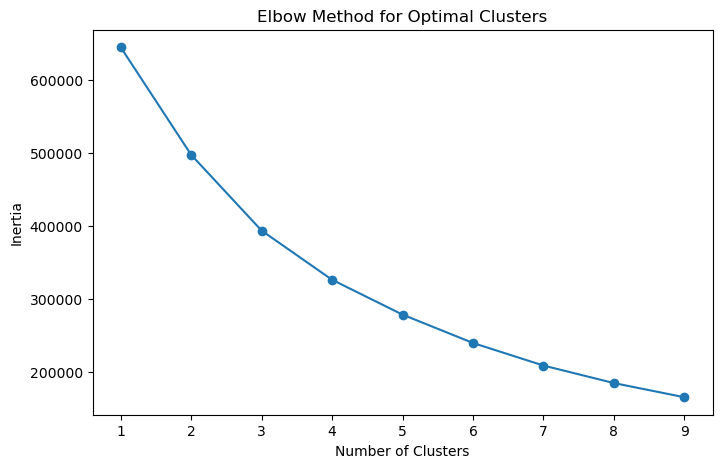

In [74]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler

# Select the numeric features for clustering
features = ['stars', 'reviews', 'boughtInLastMonth', 'revenue']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['refined_cluster'] = kmeans.fit_predict(X_scaled)

# Check the cluster assignments
print(df['refined_cluster'].value_counts())

0    156901
2      1751
1      1360
3      1303
Name: refined_cluster, dtype: int64


In [77]:
print(df.head())

           asin                                              title  stars  \
29   B01N4V4X5M  Upgraded, Anker Soundcore Boost Bluetooth Spea...    4.7   
32   B07WVP26FR  Kolaura Portable Wireless Speaker, Bluetooth 5...    4.4   
92   B083K77PZL  W-KING Bluetooth Speaker, 50W Speakers Wireles...    4.6   
143  B09J47Y789  XSOUND Portable Bluetooth Speaker Wireless 24W...    4.4   
160  B08FCDFHLB  soundcore Anker Mini 3 Bluetooth Speaker, Bass...    4.7   

     reviews  price  isBestSeller  boughtInLastMonth    categoryName  cluster  \
29     29387  39.98         False                600  Hi-Fi Speakers        1   
32      2493  15.99         False               1000  Hi-Fi Speakers        0   
92      2979  65.59         False                200  Hi-Fi Speakers        0   
143      804  22.99         False                200  Hi-Fi Speakers        0   
160     3208  34.99         False                200  Hi-Fi Speakers        0   

     revenue  cluster_price  cluster_sentiment_sal

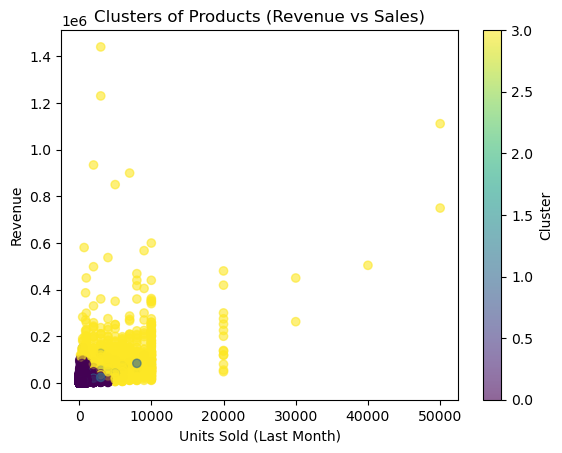

In [78]:
plt.scatter(df['boughtInLastMonth'], df['revenue'], c=df['refined_cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Products (Revenue vs Sales)')
plt.xlabel('Units Sold (Last Month)')
plt.ylabel('Revenue')
plt.colorbar(label='Cluster')
plt.show()

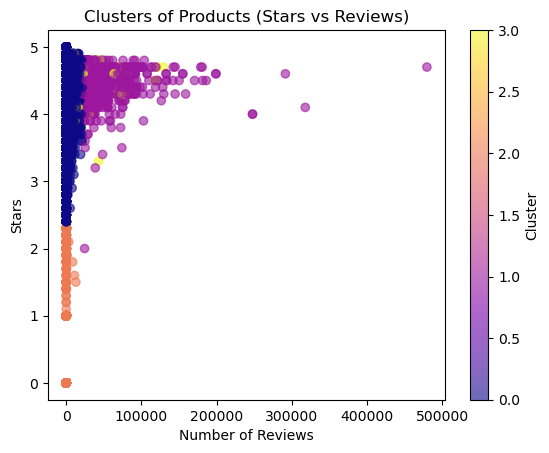

In [79]:
plt.scatter(df['reviews'], df['stars'], c=df['refined_cluster'], cmap='plasma', alpha=0.6)
plt.title('Clusters of Products (Stars vs Reviews)')
plt.xlabel('Number of Reviews')
plt.ylabel('Stars')
plt.colorbar(label='Cluster')
plt.show()

In [80]:
import numpy as np
import matplotlib.pyplot as plt

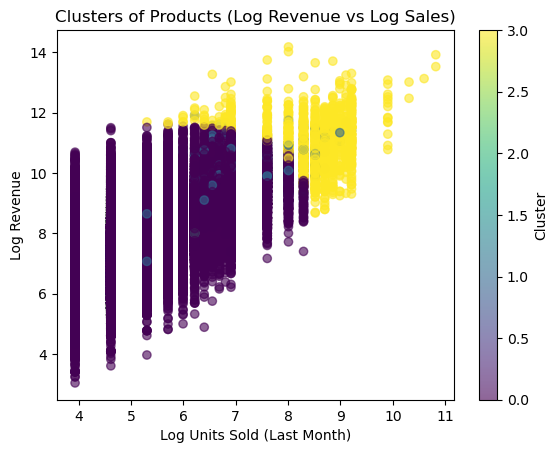

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'revenue' and 'boughtInLastMonth' columns already exist in the DataFrame

# Create log-transformed columns
df['log_revenue'] = np.log1p(df['revenue'])  # log1p to handle 0 values
df['log_sales'] = np.log1p(df['boughtInLastMonth'])

# Plot the clusters
plt.scatter(df['log_sales'], df['log_revenue'], c=df['refined_cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters of Products (Log Revenue vs Log Sales)')
plt.xlabel('Log Units Sold (Last Month)')
plt.ylabel('Log Revenue')
plt.colorbar(label='Cluster')
plt.show()

In [82]:
# Group by cluster and category
category_summary = df.groupby('refined_cluster')['categoryName'].value_counts()
print(category_summary)

refined_cluster  categoryName              
0                Pet Supplies                  8847
                 Storage & Organisation        8025
                 Health & Personal Care        7550
                 Skin Care                     6557
                 Grocery                       5859
                                               ... 
3                Pools, Hot Tubs & Supplies       1
                 Power & Hand Tools               1
                 Rough Plumbing                   1
                 Sports Supplements               1
                 Women                            1
Name: categoryName, Length: 522, dtype: int64


In [83]:
cluster_summary = df.groupby('refined_cluster')[['stars', 'reviews', 'revenue', 'boughtInLastMonth']].mean()
print(cluster_summary)

                    stars       reviews       revenue  boughtInLastMonth
refined_cluster                                                         
0                4.395174   1210.340928   2979.566580         210.360355
1                4.486176  42138.181618  11842.335662         729.080882
2                0.281325     25.109652   1494.631354          87.635637
3                4.492709  10732.878741  87390.679202        5466.922487


## Regression and Feature Engineering 

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [85]:
# Log-transforming columns to reduce skewness
df['log_reviews'] = np.log1p(df['reviews'])  # log1p handles zero values
df['log_boughtInLastMonth'] = np.log1p(df['boughtInLastMonth'])
df['log_revenue'] = np.log1p(df['revenue'])

In [86]:
features = ['stars', 'log_reviews', 'log_boughtInLastMonth', 'log_revenue']
target = 'price'
X = df[features]
y = df[target]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Mean Squared Error: {mse:.2f}")
print(f"Linear Regression - R² Score: {r2:.2f}")

Linear Regression - Mean Squared Error: 304.72
Linear Regression - R² Score: 0.52


In [89]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(f"Random Forest - R² Score: {rf.score(X_test, y_test):.2f}")

Random Forest - R² Score: 1.00


In [90]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print(f"Ridge Regression - R² Score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression - R² Score: 0.52


In [91]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores (Random Forest): {cv_scores_rf}")
print(f"Mean Cross-Validation R² Score (Random Forest): {cv_scores_rf.mean():.2f}")

Cross-Validation R² Scores (Random Forest): [0.99574135 0.96755032 0.99341586 0.98787745 0.99956615]
Mean Cross-Validation R² Score (Random Forest): 0.99


## Using Random Forest for finding options

In [92]:
df['predicted_price'] = rf.predict(X)
df['price_difference'] = df['predicted_price'] - df['price']

In [93]:
underpriced = df[df['price_difference'] > 10]
overpriced = df[df['price_difference'] < -10]

In [94]:
category_summary = df.groupby('categoryName')['price_difference'].mean()
print(category_summary.sort_values(ascending=False))

categoryName
Piano & Keyboard                       0.183839
3D Printers                            0.127656
Water Coolers, Filters & Cartridges    0.043111
Recording & Computer                   0.024948
Heating, Cooling & Air Quality         0.022414
                                         ...   
Mowers & Outdoor Power Tools          -0.230363
Storage & Home Organisation           -0.271792
Drums & Percussion                    -0.309807
PC & Video Games                      -0.526580
Coffee & Espresso Machines            -0.777554
Name: price_difference, Length: 230, dtype: float64


In [95]:
underpriced.to_csv('underpriced_products.csv', index=False)
overpriced.to_csv('overpriced_products.csv', index=False)

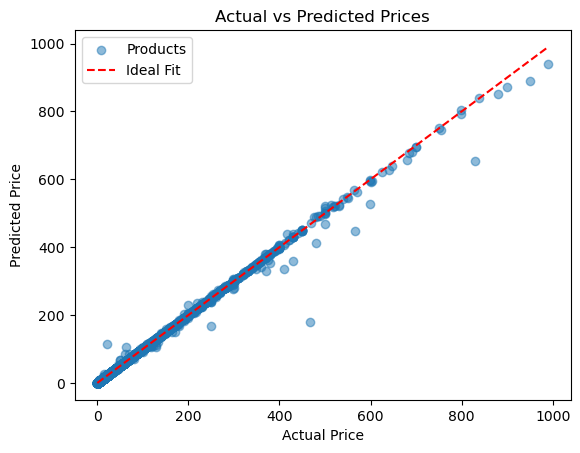

In [96]:
plt.scatter(df['price'], df['predicted_price'], alpha=0.5, label='Products')
plt.plot([df['price'].min(), df['price'].max()], 
         [df['price'].min(), df['price'].max()], '--', color='red', label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [97]:
# Creating a DataFrame for actual and predicted prices
results_df = pd.DataFrame({
    'Product Title': X_test.index.map(df['title']),  # Map titles to the test set
    'Category': X_test.index.map(df['categoryName']),
    'Actual Price': y_test,
    'Predicted Price': rf_pred,  # Replace with ridge_pred or y_pred_linear if needed
    'Price Difference': rf_pred - y_test
})

# Export to CSV
results_df.to_csv('regression_results.csv', index=False)

print("Results exported to 'regression_results.csv'")

Results exported to 'regression_results.csv'


In [98]:
##Actual vs optimal prices

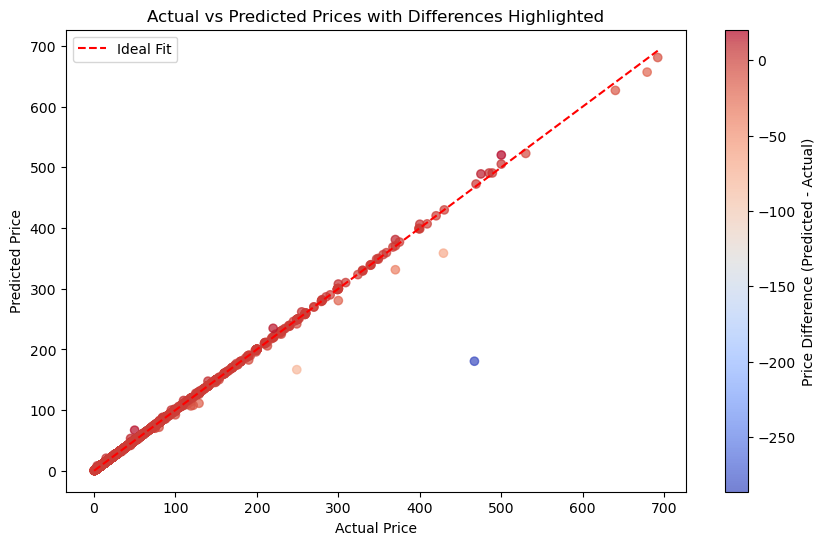

In [99]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the difference
price_diff = rf_pred - y_test

# Plot with color-coded points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, rf_pred, c=price_diff, cmap='coolwarm', alpha=0.7)
plt.colorbar(scatter, label="Price Difference (Predicted - Actual)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices with Differences Highlighted")
plt.legend()
plt.show()

Number of outliers removed: 3


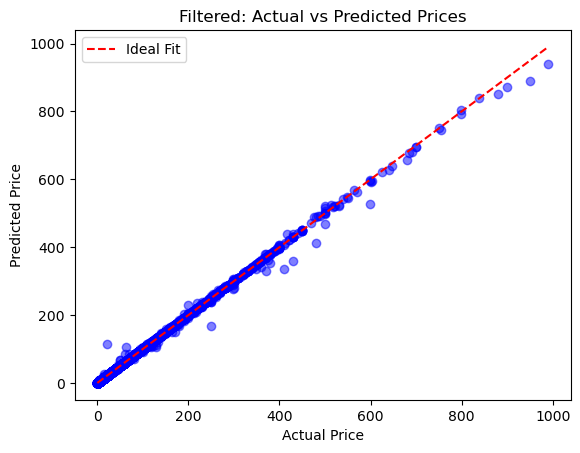

In [100]:
# Calculate the absolute difference between predicted and actual prices
df['price_difference'] = abs(df['predicted_price'] - df['price'])

# Define a threshold for outliers
threshold = 100  # Adjust this based on your data and use case

# Filter out outliers
df_filtered = df[df['price_difference'] <= threshold]

# Print the number of outliers removed
print(f"Number of outliers removed: {len(df) - len(df_filtered)}")

# Optional: Visualize the filtered data
plt.scatter(df_filtered['price'], df_filtered['predicted_price'], alpha=0.5, c='blue')
plt.plot([df_filtered['price'].min(), df_filtered['price'].max()], 
         [df_filtered['price'].min(), df_filtered['price'].max()], 
         'r--', label='Ideal Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Filtered: Actual vs Predicted Prices')
plt.legend()
plt.show()

In [109]:
threshold = df['price_difference'].std() * 3  # 3 standard deviations from the mean

In [101]:
# Top product categories with most drastic price differences
category_price_diff = (
    df.groupby('categoryName')['price_difference']
    .mean()
    .sort_values(ascending=False)
)
print("Top Categories with Most Drastic Price Differences:")
print(category_price_diff.head(10))

# Bottom product categories (least price difference)
print("\nCategories with Least Price Differences:")
print(category_price_diff.tail(10))

# Top individual products with the most drastic price differences
top_products_overpriced = df.sort_values(by='price_difference', ascending=False).head(10)
top_products_underpriced = df.sort_values(by='price_difference', ascending=False).tail(10)

print("\nTop Overpriced Products:")
print(top_products_overpriced[['title', 'categoryName', 'price', 'predicted_price', 'price_difference']])

print("\nTop Underpriced Products:")
print(top_products_underpriced[['title', 'categoryName', 'price', 'predicted_price', 'price_difference']])

Top Categories with Most Drastic Price Differences:
categoryName
Coffee & Espresso Machines             1.254081
PC & Video Games                       0.814453
Vacuums & Floorcare                    0.375709
Piano & Keyboard                       0.354528
Storage & Home Organisation            0.333809
Drums & Percussion                     0.310236
Mowers & Outdoor Power Tools           0.246638
3D Printers                            0.164456
Wearable Technology                    0.150104
Water Coolers, Filters & Cartridges    0.094962
Name: price_difference, dtype: float64

Categories with Least Price Differences:
categoryName
Motorbike Seat Covers                  2.131628e-14
Adapters                               1.931788e-14
Outdoor Rope Lights                    1.909584e-14
Ballet & Dancing Footwear              1.835569e-14
Handmade Artwork                       1.539509e-14
Test & Measurement                     1.321165e-14
USB Hubs                               9.769963e-

In [115]:
underpriced.to_csv('underpriced_products.csv', index=False)
overpriced.to_csv('overpriced_products.csv', index=False)

In [114]:
# Ensure necessary libraries are imported
import pandas as pd
import numpy as np

# Recreate price difference column
df['price_difference'] = abs(df['predicted_price'] - df['price'])

# Define a threshold for filtering
threshold = 100  # Adjust as needed
df_filtered = df[df['price_difference'] <= threshold]

# Select relevant columns for products
product_performance = df_filtered[['asin', 'title', 'price', 'predicted_price', 'price_difference']]

# Save to CSV
output_file = 'product_performance_price_difference.csv'
product_performance.to_csv(output_file, index=False)

print(f"Product performance saved to: {output_file}")

Product performance saved to: product_performance_price_difference.csv


In [103]:
#Checking data shape
print(df.shape)
print(df.columns)

(161315, 21)
Index(['asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'categoryName', 'cluster', 'revenue',
       'cluster_price', 'cluster_sentiment_sales', 'cluster_popularity',
       'product_cluster', 'refined_cluster', 'log_revenue', 'log_sales',
       'log_reviews', 'log_boughtInLastMonth', 'predicted_price',
       'price_difference'],
      dtype='object')


In [104]:
import pandas as pd

# Function to recommend products based on cluster
def recommend_products(product_asin, df, top_n=5):
    """
    Recommends products based on the cluster of the given product.

    Parameters:
    - product_asin (str): ASIN of the product for which recommendations are needed.
    - df (DataFrame): The dataset containing product information and clusters.
    - top_n (int): Number of recommendations to return.

    Returns:
    - DataFrame: Top N recommended products from the same cluster.
    """
    # Find the cluster of the input product
    product_cluster = df.loc[df['asin'] == product_asin, 'refined_cluster']
    
    if product_cluster.empty:
        return f"Product with ASIN {product_asin} not found in the dataset."
    
    product_cluster = product_cluster.iloc[0]

    # Filter products in the same cluster
    same_cluster_products = df[df['refined_cluster'] == product_cluster]
    
    # Exclude the input product from recommendations
    recommendations = same_cluster_products[same_cluster_products['asin'] != product_asin]
    
    # Sort recommendations by log_revenue, stars, and boughtInLastMonth
    recommendations = recommendations.sort_values(
        by=['log_revenue', 'stars', 'boughtInLastMonth'], 
        ascending=False
    )

    return recommendations.head(top_n)

# Example Usage
product_asin = 'B01N4V4X5M'  # Replace with a specific ASIN to test
top_recommendations = recommend_products(product_asin, df, top_n=5)

if isinstance(top_recommendations, str):
    print(top_recommendations)  # If product not found
else:
    print(top_recommendations[['asin', 'title', 'stars', 'log_revenue', 'boughtInLastMonth']])

               asin                                              title  stars  \
17653    B00400OMU0  De'Longhi Magnifica S, Automatic Bean to Cup C...    4.6   
1252811  B00NVMIO02  Braun Healthcare ThermoScan 7 Ear thermometer ...    4.8   
242266   B00FXNABPI  Amazon Basics Slim Velvet Non-Slip Suit Hanger...    4.7   
11321    B09BXH5MC1  Fitbit Charge 5 Activity Tracker with 6-months...    4.3   
11299    B08DFPV5Y2  Fitbit Versa 3 Health & Fitness Smartwatch wit...    4.5   

         log_revenue  boughtInLastMonth  
17653      11.918364                500  
1252811    11.753288               3000  
242266     11.669168               9000  
11321      11.662216                900  
11299      11.619095                800  


In [105]:
# Display products in the 'Health & Personal Care' category
health_care_products = df[df['categoryName'] == 'Health & Personal Care']
print(health_care_products[['asin', 'title']].head(10))

               asin                                              title
1252283  B07V2N4SJY  Amazon Brand – Mama Bear Sensitive Unscented B...
1252284  B07CD8N63G  Nature Spell Rosemary Oil for Hair & Skin 150m...
1252285  B08MXSBRSB  WaterWipes Original Plastic Free Baby Wipes, 7...
1252286  B001ETUD5I  Nizoral Anti-dandruff Shampoo, Treats and Prev...
1252287  B004RDYI04  Sudafed Blocked Nose Spray, Relief from Conges...
1252288  B0BH8SHD38  Step Ahead Covid-19 Lateral Flow Testing Kit |...
1252289  B07649WV5Y  Omega 3 Fish Oil 2000mg, EPA 660mg DHA 440mg p...
1252290  B003VQZC3U  Vitabiotics Ultra Vitamin D Tablets 1000IU Opt...
1252291  B000LNEB1A  Neutrogena T/Gel Therapeutic Shampoo Treatment...
1252292  B09QXMZHV8  Finish Ultimate Infinity Shine Dishwasher Tabl...


In [106]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Function to recommend similar products in 'Health & Personal Care' category
def recommend_health_care_products(product_asin, df, n_recommendations=5):
    """
    Recommends products similar to the given ASIN within the 'Health & Personal Care' category.
    
    Parameters:
    - product_asin (str): ASIN of the product to find similar items.
    - df (DataFrame): The dataset containing product attributes.
    - n_recommendations (int): Number of recommendations to return.

    Returns:
    - DataFrame: Similar products in the same category.
    """
    # Filter dataset for 'Health & Personal Care' category
    health_care_df = df[df['categoryName'] == 'Health & Personal Care'].reset_index(drop=True)
    
    # Ensure the ASIN exists in the filtered dataset
    if product_asin not in health_care_df['asin'].values:
        return f"ASIN {product_asin} not found in 'Health & Personal Care' category."
    
    # Use numerical features for similarity calculation
    features = ['log_revenue', 'stars', 'boughtInLastMonth', 'price']
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(health_care_df[features])
    
    # Compute cosine similarity
    similarity_matrix = cosine_similarity(scaled_features)
    
    # Get index of the chosen product
    product_idx = health_care_df.index[health_care_df['asin'] == product_asin].tolist()[0]
    
    # Get similarity scores and sort
    similarity_scores = similarity_matrix[product_idx]
    similar_indices = similarity_scores.argsort()[-(n_recommendations + 1):-1][::-1]  # Exclude self
    
    # Return top similar products
    return health_care_df.iloc[similar_indices][['asin', 'title', 'stars', 'log_revenue', 'boughtInLastMonth']]

# Example Usage
health_care_asin = 'B07V2N4SJY'  # Example ASIN
recommendations = recommend_health_care_products(health_care_asin, df, n_recommendations=5)

# Display recommendations
if isinstance(recommendations, str):
    print(recommendations)  # If ASIN not found
else:
    print(recommendations)

           asin                                              title  stars  \
4    B004RDYI04  Sudafed Blocked Nose Spray, Relief from Conges...    4.7   
3    B001ETUD5I  Nizoral Anti-dandruff Shampoo, Treats and Prev...    4.6   
5    B0BH8SHD38  Step Ahead Covid-19 Lateral Flow Testing Kit |...    4.4   
126  B073V1M851  Colgate Max White Sparkle Diamonds Toothpaste ...    4.5   
14   B08K4JPSKK  Dulcolax Adult 5 mg Gastro-resistant Tablets -...    4.5   

     log_revenue  boughtInLastMonth  
4      11.289794              20000  
3      11.823354              20000  
5      11.842236              20000  
126     9.903538              10000  
14     10.085851              10000  


In [107]:
import numpy as np

# Convert log_revenue back to actual revenue
df['actual_revenue'] = np.expm1(df['log_revenue'])  # expm1 calculates e^(x) - 1

In [108]:
import numpy as np

# Convert log_revenue back to actual revenue
df['actual_revenue'] = np.expm1(df['log_revenue'])

# Save to CSV
df.to_csv('health_care_recommendations_with_revenue.csv', index=False)

# Confirm the output
print("CSV file 'health_care_recommendations_with_revenue.csv' has been created.")

CSV file 'health_care_recommendations_with_revenue.csv' has been created.
